# Computer Vision

Install necessary libraries

In [1]:
#!pip install --upgrade --trusted-host pypi.org --trusted-host files.pythonhosted.org azure-cognitiveservices-vision-computervision 

In [37]:
#!pip install --upgrade --trusted-host pypi.org --trusted-host files.pythonhosted.org pillow

  Using cached Pillow-8.1.0-cp38-cp38-win_amd64.whl (2.2 MB)
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


Import necessary libraries

In [49]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

from array import array
import os
from PIL import Image
import sys
import time
import requests
import io
import IPython

Define subscription endpoint and key

In [4]:
subscription_key = "PLEASE_ENTER_YOUR_OWN_KEY"
endpoint = "https://PLEASE_ENTER_YOUR_OWN_ENDPOINT_NAME.cognitiveservices.azure.com/"

Define the authentication client

In [5]:
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))

Define the image URL

In [15]:
remote_image_url = "https://upload.wikimedia.org/wikipedia/commons/b/b1/AIA_Tower_2013.jpg"

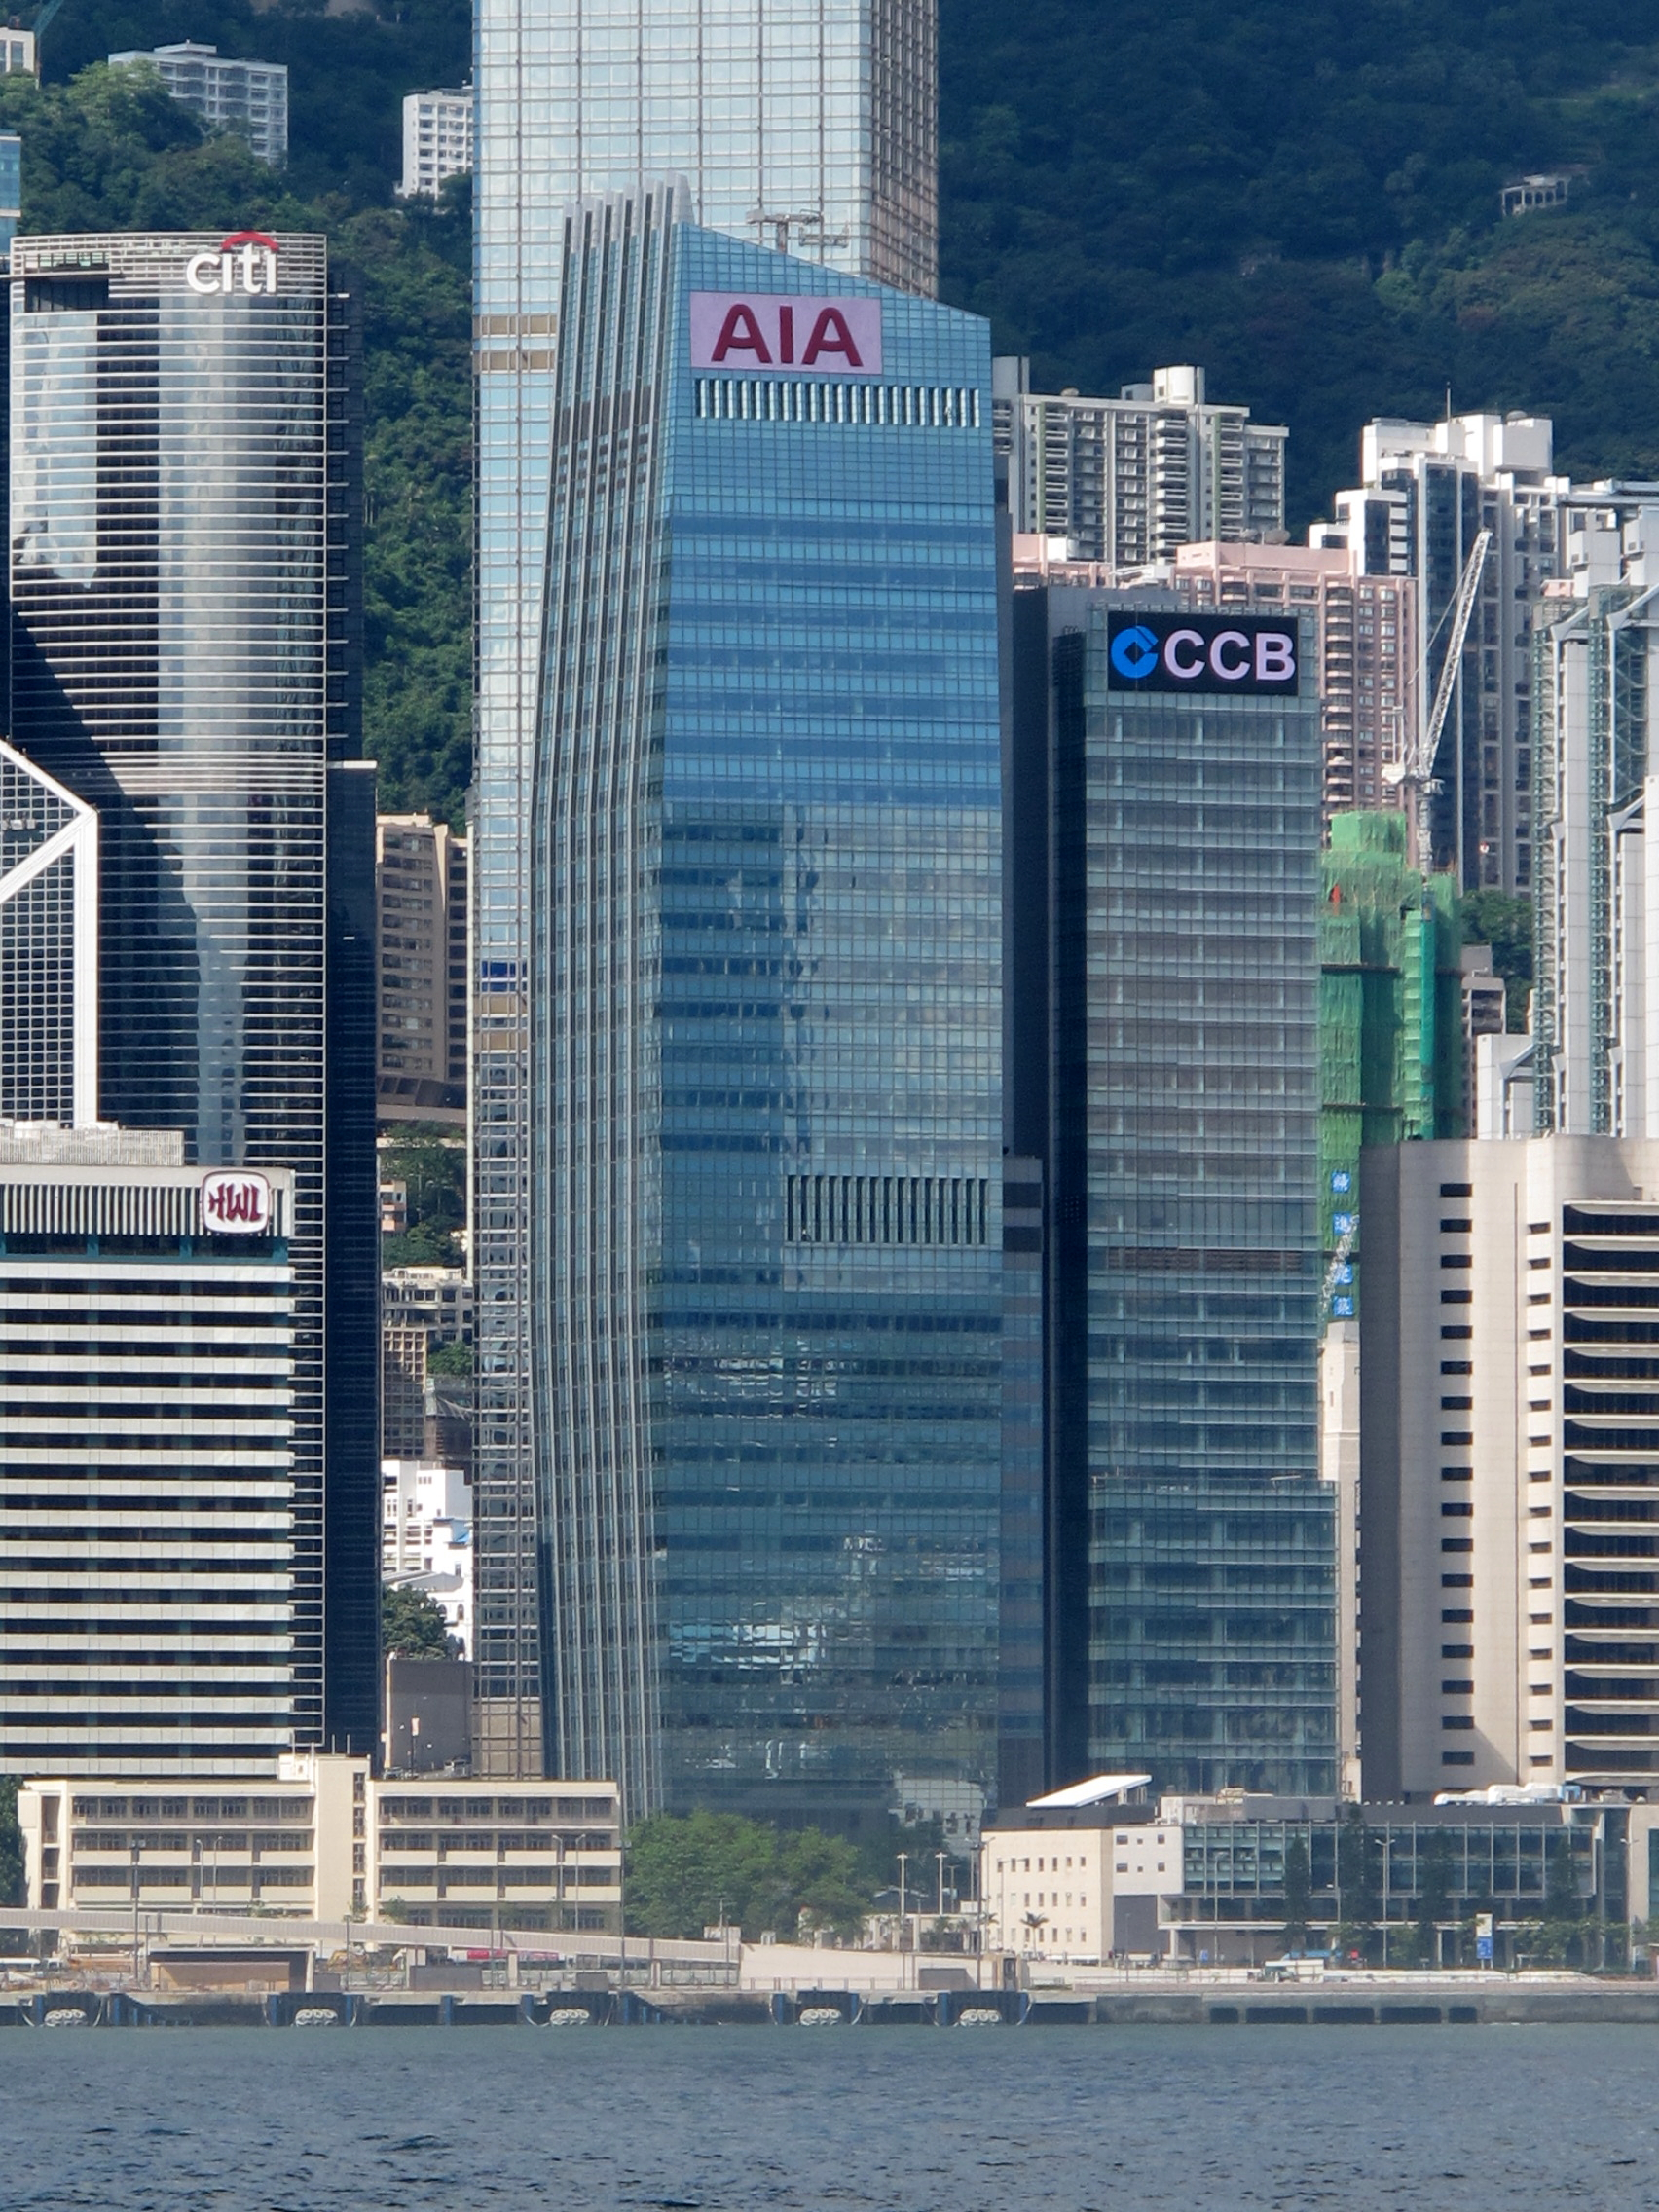

In [51]:
IPython.display.Image(remote_image_url, width = 250)

Get image description

In [50]:
'''
Describe an Image - remote
This example describes the contents of an image with the confidence score.
'''
print("===== Describe an image - remote =====")
# Call API
description_results = computervision_client.describe_image(remote_image_url )

# Get the captions (descriptions) from the response, with confidence level
print("Description of remote image: ")
if (len(description_results.captions) == 0):
    print("No description detected.")
else:
    for caption in description_results.captions:
        print("'{}' with confidence {:.2f}%".format(caption.text, caption.confidence * 100))

===== Describe an image - remote =====
Description of remote image: 
'a city with tall buildings' with confidence 36.78%


Get image category

In [52]:
'''
Categorize an Image - remote
This example extracts (general) categories from a remote image with a confidence score.
'''
print("===== Categorize an image - remote =====")
# Select the visual feature(s) you want.
remote_image_features = ["categories"]
# Call API with URL and features
categorize_results_remote = computervision_client.analyze_image(remote_image_url , remote_image_features)

# Print results with confidence score
print("Categories from remote image: ")
if (len(categorize_results_remote.categories) == 0):
    print("No categories detected.")
else:
    for category in categorize_results_remote.categories:
        print("'{}' with confidence {:.2f}%".format(category.name, category.score * 100))

===== Categorize an image - remote =====
Categories from remote image: 
'building_street' with confidence 69.92%
'outdoor_' with confidence 0.39%


Get image tags

In [53]:
'''
Tag an Image - remote
This example returns a tag (key word) for each thing in the image.
'''
print("===== Tag an image - remote =====")
# Call API with remote image
tags_result_remote = computervision_client.tag_image(remote_image_url )

# Print results with confidence score
print("Tags in the remote image: ")
if (len(tags_result_remote.tags) == 0):
    print("No tags detected.")
else:
    for tag in tags_result_remote.tags:
        print("'{}' with confidence {:.2f}%".format(tag.name, tag.confidence * 100))

===== Tag an image - remote =====
Tags in the remote image: 
'outdoor' with confidence 97.47%
'tower' with confidence 95.82%
'downtown' with confidence 85.99%
'building' with confidence 80.83%
'skyline' with confidence 72.98%
'cityscape' with confidence 72.61%
'city' with confidence 66.68%
'high rise' with confidence 64.26%
'tower block' with confidence 56.61%
'metropolitan area' with confidence 51.59%
'skyscraper' with confidence 26.56%


Detect objects

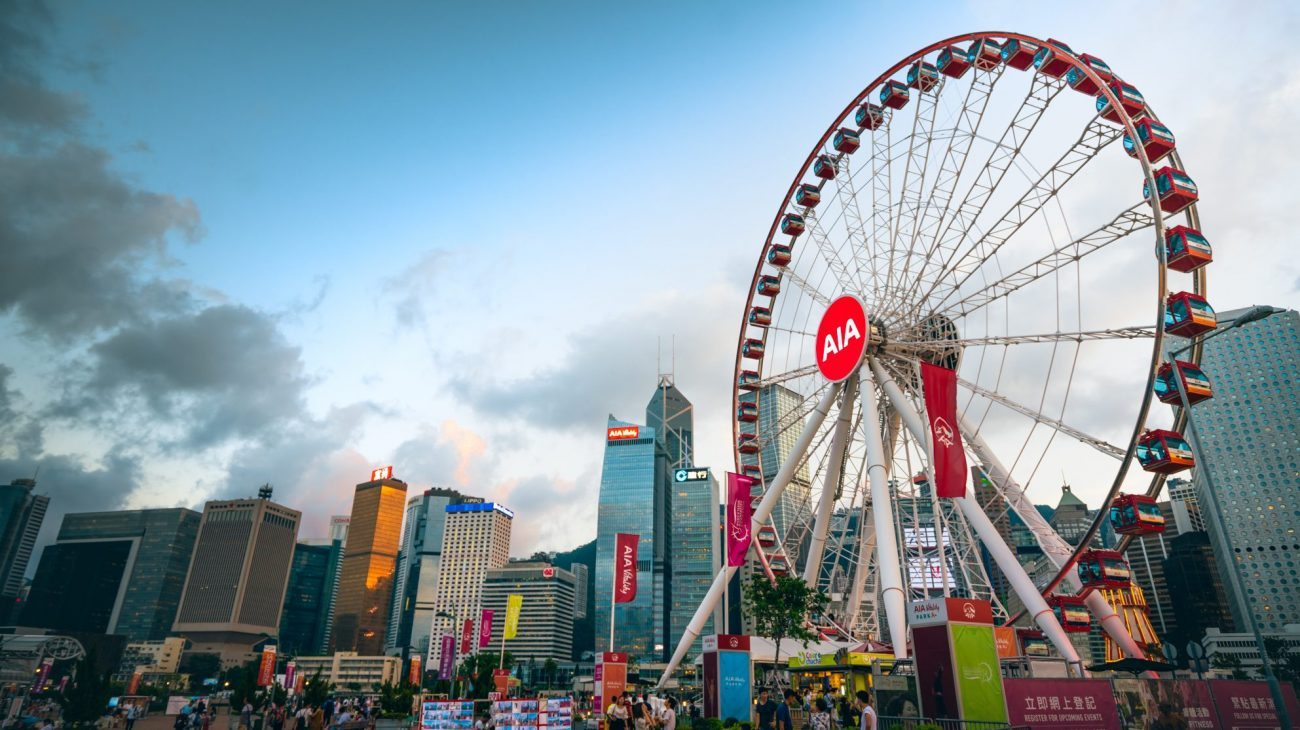

In [55]:
IPython.display.Image(remote_image_url_objects, width = 250)

In [54]:
'''
Detect Objects - remote
This example detects different kinds of objects with bounding boxes in a remote image.
'''
print("===== Detect Objects - remote =====")
# Get URL image with different objects
remote_image_url_objects = "https://hkow.hk/wp-content/uploads/2018/09/HKOW-Pano-1.jpg"
# Call API with URL
detect_objects_results_remote = computervision_client.detect_objects(remote_image_url_objects)

# Print detected objects results with bounding boxes
print("Detecting objects in remote image:")
if len(detect_objects_results_remote.objects) == 0:
    print("No objects detected.")
else:
    for object in detect_objects_results_remote.objects:
        print("object at location {}, {}, {}, {}".format( \
        object.rectangle.x, object.rectangle.x + object.rectangle.w, \
        object.rectangle.y, object.rectangle.y + object.rectangle.h))

===== Detect Objects - remote =====
Detecting objects in remote image:
object at location 5, 57, 484, 652
object at location 414, 505, 500, 658
object at location 1180, 1299, 307, 691
object at location 156, 300, 483, 687
object at location 744, 1215, 41, 707


Detect brands

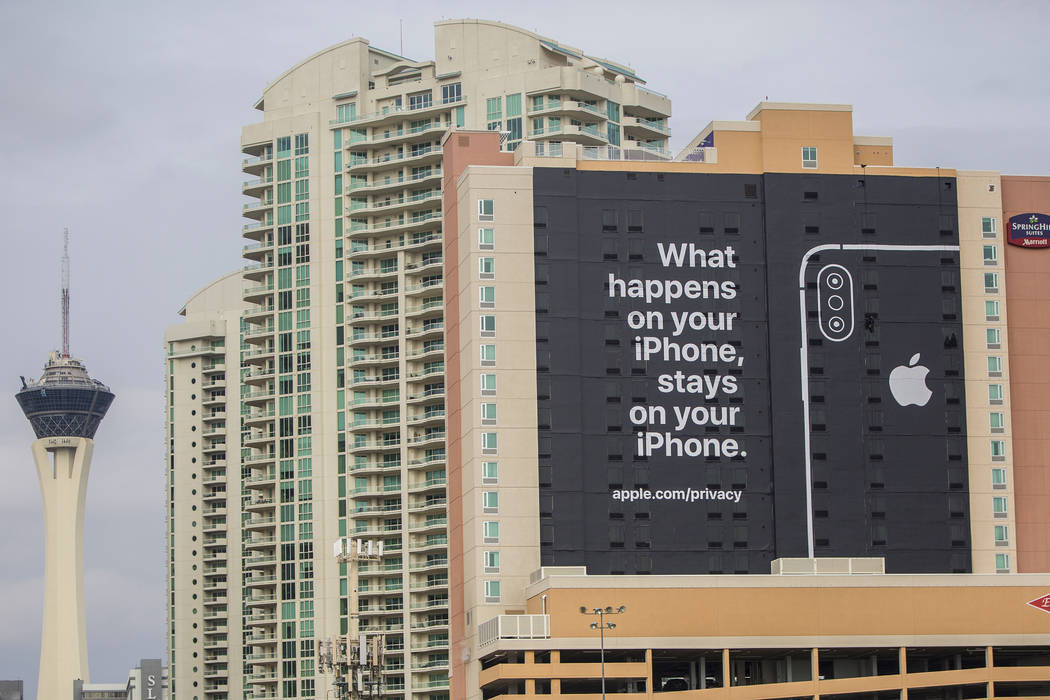

In [59]:
IPython.display.Image(remote_image_url, width = 250)

In [58]:
'''
Detect Brands - remote
This example detects common brands like logos and puts a bounding box around them.
'''
print("===== Detect Brands - remote =====")
# Get a URL with a brand logo
remote_image_url = "https://www.reviewjournal.com/wp-content/uploads/2019/12/13098467_web1_111.jpg"
# Select the visual feature(s) you want
remote_image_features = ["brands"]
# Call API with URL and features
detect_brands_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

print("Detecting brands in remote image: ")
if len(detect_brands_results_remote.brands) == 0:
    print("No brands detected.")
else:
    for brand in detect_brands_results_remote.brands:
        print("'{}' brand detected with confidence {:.1f}% at location {}, {}, {}, {}".format( \
        brand.name, brand.confidence * 100, brand.rectangle.x, brand.rectangle.x + brand.rectangle.w, \
        brand.rectangle.y, brand.rectangle.y + brand.rectangle.h))

===== Detect Brands - remote =====
Detecting brands in remote image: 
'Apple' brand detected with confidence 83.6% at location 890, 935, 347, 413


Detect faces

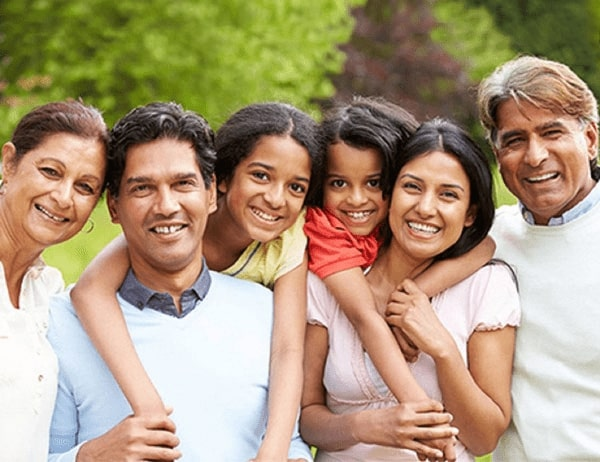

In [61]:
IPython.display.Image(remote_image_url_faces, width = 250)

In [60]:
'''
Detect Faces - remote
This example detects faces in a remote image, gets their gender and age, 
and marks them with a bounding box.
'''
print("===== Detect Faces - remote =====")
# Get an image with faces
remote_image_url_faces = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/faces.jpg"
# Select the visual feature(s) you want.
remote_image_features = ["faces"]
# Call the API with remote URL and features
detect_faces_results_remote = computervision_client.analyze_image(remote_image_url_faces, remote_image_features)

# Print the results with gender, age, and bounding box
print("Faces in the remote image: ")
if (len(detect_faces_results_remote.faces) == 0):
    print("No faces detected.")
else:
    for face in detect_faces_results_remote.faces:
        print("'{}' of age {} at location {}, {}, {}, {}".format(face.gender, face.age, \
        face.face_rectangle.left, face.face_rectangle.top, \
        face.face_rectangle.left + face.face_rectangle.width, \
        face.face_rectangle.top + face.face_rectangle.height))

===== Detect Faces - remote =====
Faces in the remote image: 
'Male' of age 39 at location 118, 159, 212, 253
'Male' of age 54 at location 492, 111, 582, 201
'Female' of age 55 at location 18, 153, 102, 237
'Female' of age 33 at location 386, 166, 467, 247
'Female' of age 18 at location 235, 158, 311, 234
'Female' of age 8 at location 323, 163, 391, 231


Detect adult, racy, or gory content

In [62]:
'''
Detect Adult or Racy Content - remote
This example detects adult or racy content in a remote image, then prints the adult/racy score.
The score is ranged 0.0 - 1.0 with smaller numbers indicating negative results.
'''
print("===== Detect Adult or Racy Content - remote =====")
# Select the visual feature(s) you want
remote_image_features = ["adult"]
# Call API with URL and features
detect_adult_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results with adult/racy score
print("Analyzing remote image for adult or racy content ... ")
print("Is adult content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_adult_content, detect_adult_results_remote.adult.adult_score * 100))
print("Has racy content: {} with confidence {:.2f}".format(detect_adult_results_remote.adult.is_racy_content, detect_adult_results_remote.adult.racy_score * 100))

===== Detect Adult or Racy Content - remote =====
Analyzing remote image for adult or racy content ... 
Is adult content: False with confidence 0.06
Has racy content: False with confidence 0.07


Get image color scheme

In [63]:
'''
Detect Color - remote
This example detects the different aspects of its color scheme in a remote image.
'''
print("===== Detect Color - remote =====")
# Select the feature(s) you want
remote_image_features = ["color"]
# Call API with URL and features
detect_color_results_remote = computervision_client.analyze_image(remote_image_url, remote_image_features)

# Print results of color scheme
print("Getting color scheme of the remote image: ")
print("Is black and white: {}".format(detect_color_results_remote.color.is_bw_img))
print("Accent color: {}".format(detect_color_results_remote.color.accent_color))
print("Dominant background color: {}".format(detect_color_results_remote.color.dominant_color_background))
print("Dominant foreground color: {}".format(detect_color_results_remote.color.dominant_color_foreground))
print("Dominant colors: {}".format(detect_color_results_remote.color.dominant_colors))

===== Detect Color - remote =====
Getting color scheme of the remote image: 
Is black and white: False
Accent color: 8A6641
Dominant background color: Grey
Dominant foreground color: Grey
Dominant colors: ['Grey']


Get domain-specific content

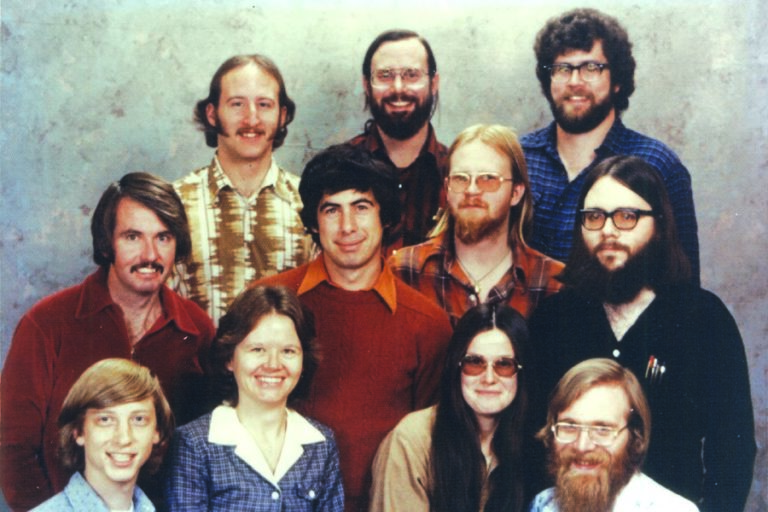

In [69]:
IPython.display.Image(remote_image_url_celebs, width = 250)

In [68]:
'''
Detect Domain-specific Content - remote
This example detects celebrites and landmarks in remote images.
'''
print("===== Detect Domain-specific Content - remote =====")
# URL of one or more celebrities
remote_image_url_celebs = "https://3er1viui9wo30pkxh1v2nh4w-wpengine.netdna-ssl.com/wp-content/uploads/prod/2019/01/Microsoft-Founded-1-768x512.jpg"
# Call API with content type (celebrities) and URL
detect_domain_results_celebs_remote = computervision_client.analyze_image_by_domain("celebrities", remote_image_url_celebs)

# Print detection results with name
print("Celebrities in the remote image:")
if len(detect_domain_results_celebs_remote.result["celebrities"]) == 0:
    print("No celebrities detected.")
else:
    for celeb in detect_domain_results_celebs_remote.result["celebrities"]:
        print(celeb["name"])

===== Detect Domain-specific Content - remote =====
Celebrities in the remote image:
Bill Gates
Jim Lane
Bob Wallace


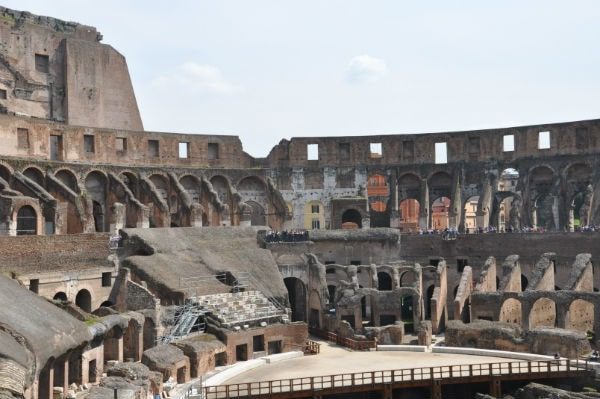

In [72]:
IPython.display.Image(remote_image_url_land, width = 250)

In [71]:
# Call API with content type (landmarks) and URL
remote_image_url_land = "https://raw.githubusercontent.com/Azure-Samples/cognitive-services-sample-data-files/master/ComputerVision/Images/landmark.jpg"
detect_domain_results_landmarks = computervision_client.analyze_image_by_domain("landmarks", remote_image_url_land)
print()

print("Landmarks in the remote image:")
if len(detect_domain_results_landmarks.result["landmarks"]) == 0:
    print("No landmarks detected.")
else:
    for landmark in detect_domain_results_landmarks.result["landmarks"]:
        print(landmark["name"])


Landmarks in the remote image:
Colosseum


Read printed and handwritten text

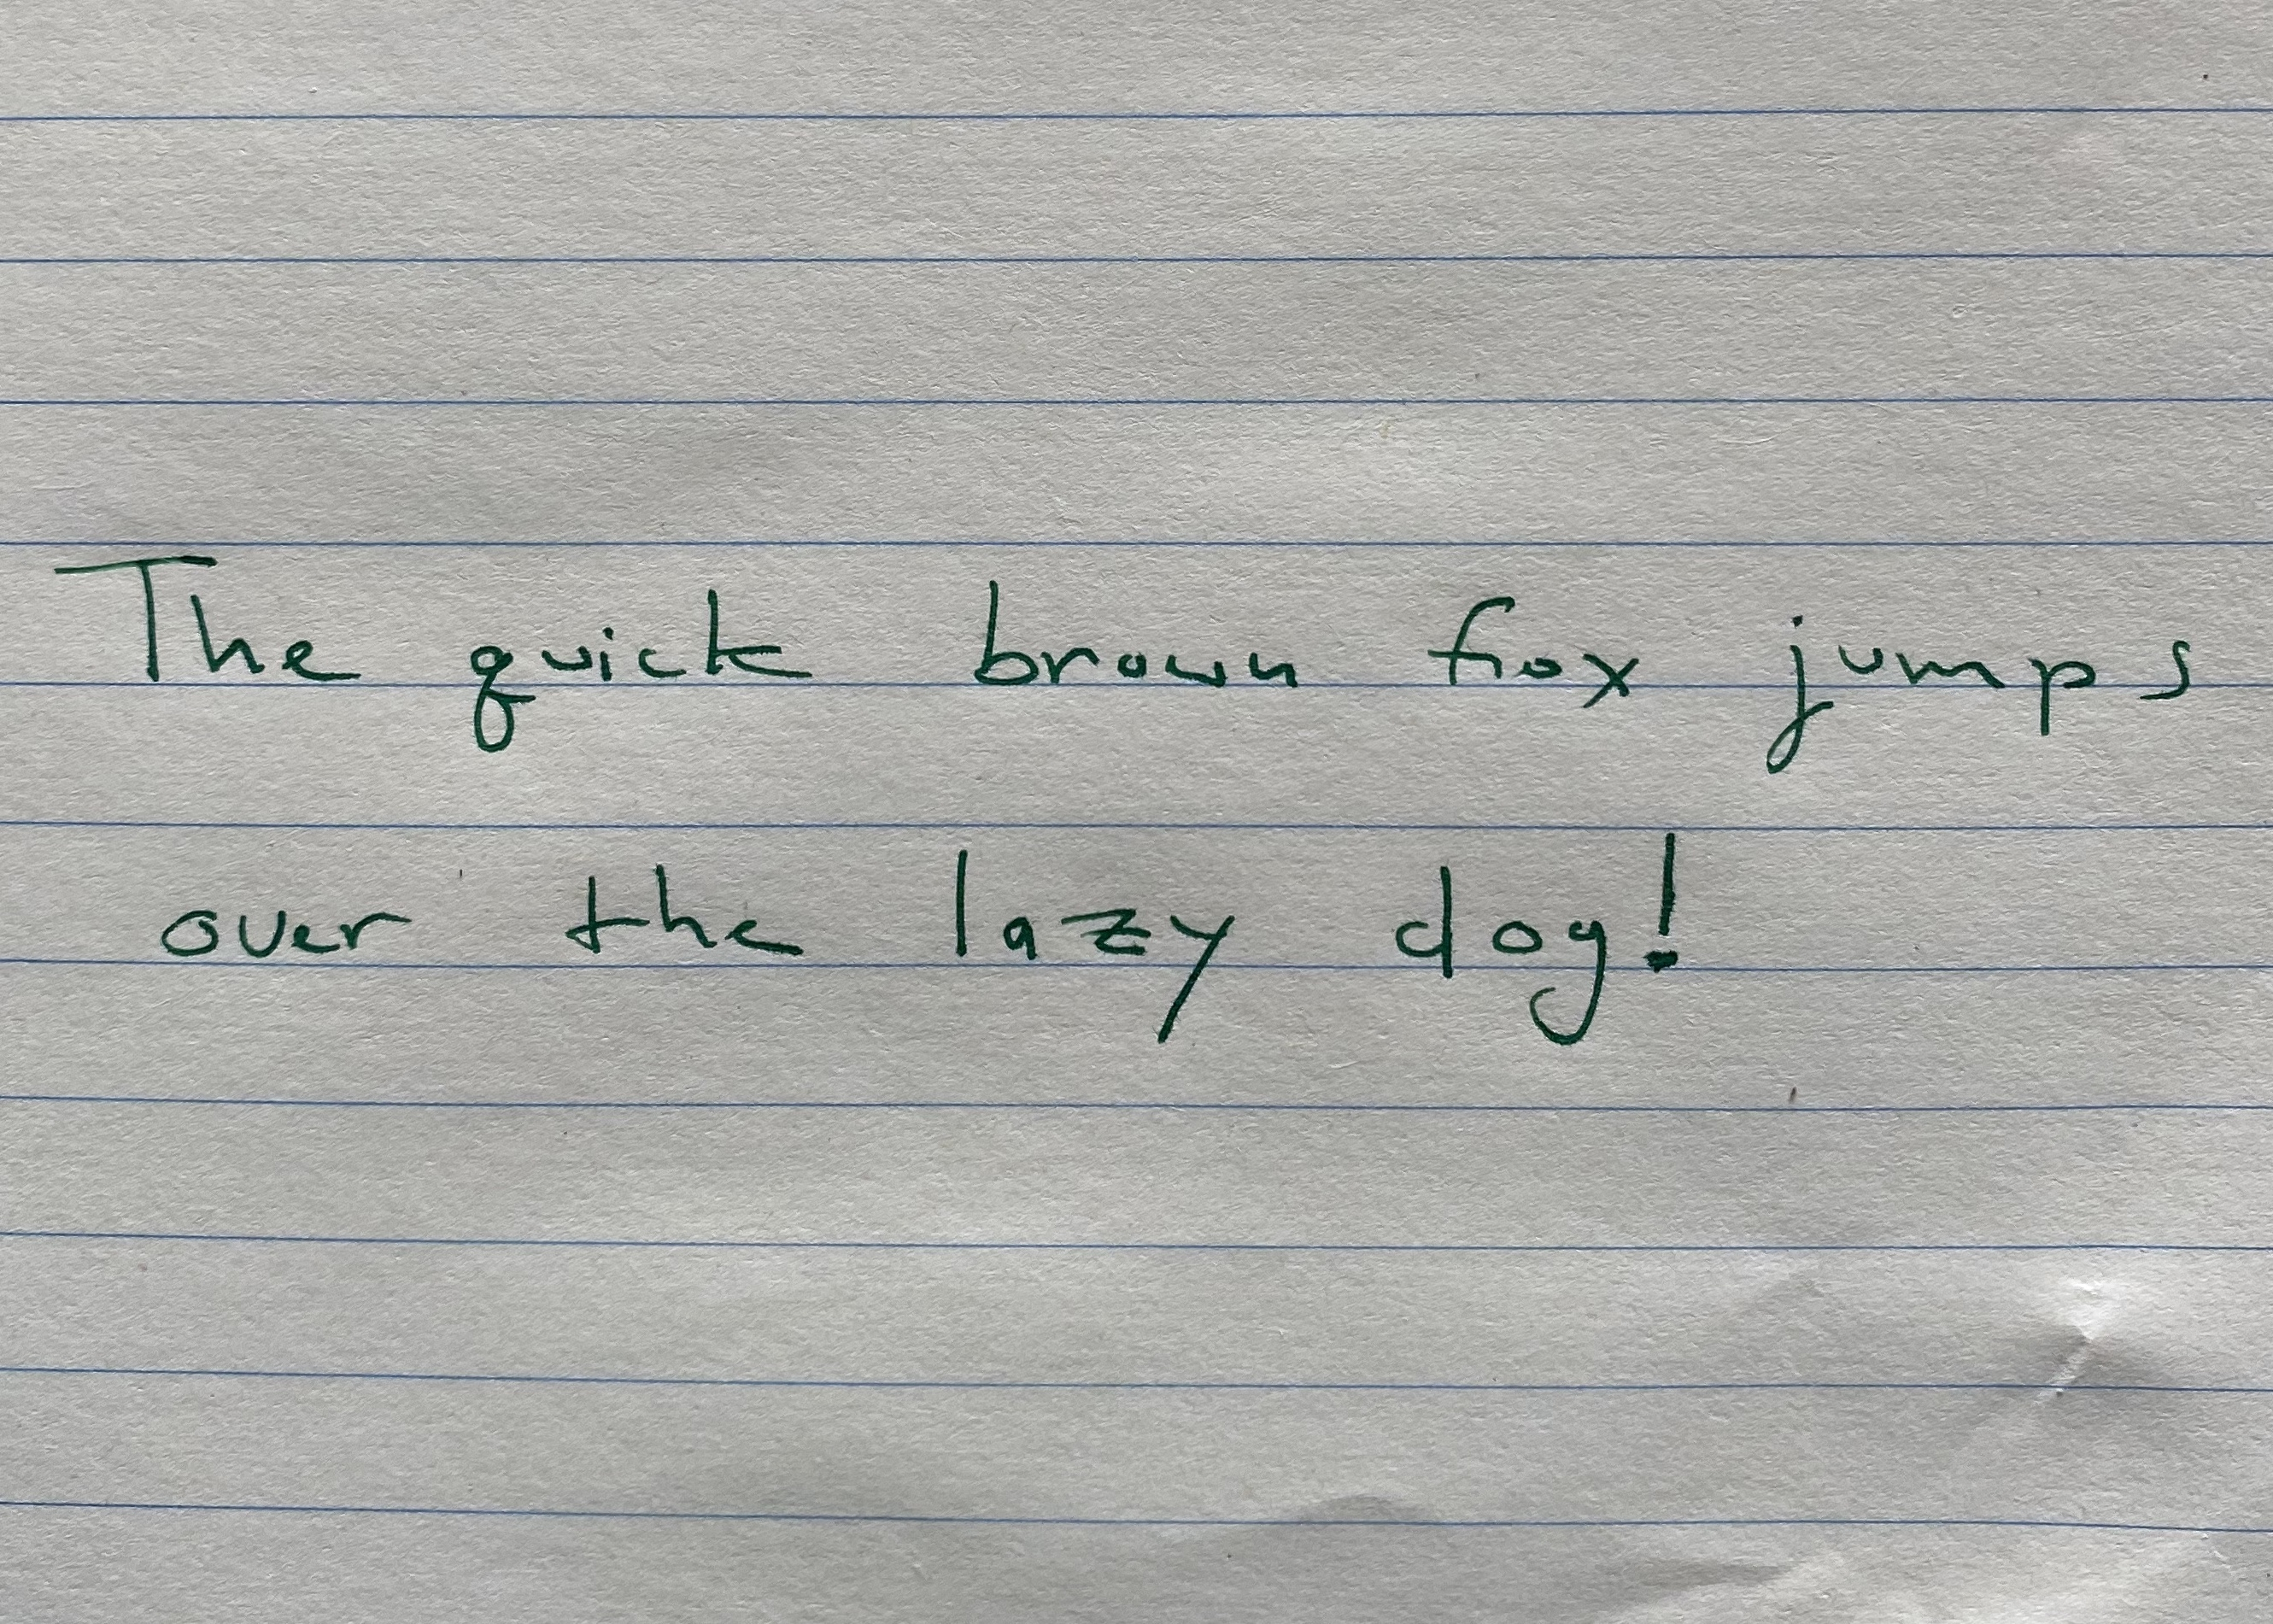

In [94]:
IPython.display.Image(remote_image_handw_text_url, width = 250)

In [78]:
# Call the Read API
'''
Batch Read File, recognize handwritten text - remote
This example will extract handwritten text in an image, then print results, line by line.
This API call can also recognize handwriting (not shown).
'''
print("===== Batch Read File - remote =====")
# Get an image with handwritten text
remote_image_handw_text_url = "https://raw.githubusercontent.com/MicrosoftDocs/azure-docs/master/articles/cognitive-services/Computer-vision/Images/readsample.jpg"

# Call API with URL and raw response (allows you to get the operation location)
recognize_handw_results = computervision_client.read(remote_image_handw_text_url,  raw=True)

===== Batch Read File - remote =====


In [80]:
# Get Read results
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_handw_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_handw_text_results = computervision_client.get_read_result(operation_id)
    if get_handw_text_results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

The quick brown fox jumps
[38.0, 650.0, 2572.0, 699.0, 2570.0, 854.0, 37.0, 815.0]
over
[184.0, 1053.0, 508.0, 1044.0, 510.0, 1123.0, 184.0, 1128.0]
the lazy dog!
[639.0, 1011.0, 1976.0, 1026.0, 1974.0, 1158.0, 637.0, 1141.0]



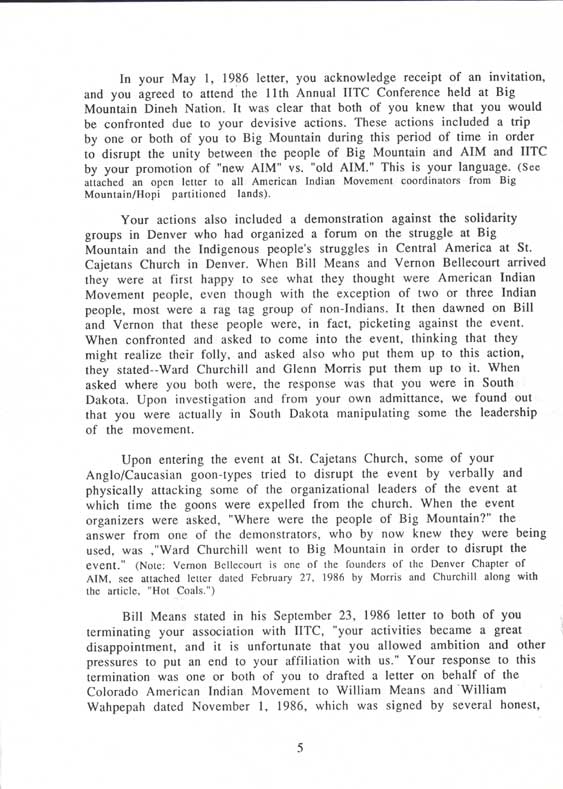

In [104]:
IPython.display.Image(remote_image_handw_text_url_2, width = 250)

In [101]:
# Call the Read API
'''
Batch Read File, recognize handwritten text - remote
This example will extract handwritten text in an image, then print results, line by line.
This API call can also recognize handwriting (not shown).
'''
print("===== Batch Read File - remote =====")
# Get an image with handwritten text
remote_image_handw_text_url_2 = "https://www.aimovement.org/csi/Churchill/churchill_belle_11_24_93_05.jpg"

# Call API with URL and raw response (allows you to get the operation location)
recognize_handw_results = computervision_client.read(remote_image_handw_text_url_2,  raw=True)

===== Batch Read File - remote =====


In [102]:
# Get Read results
# Get the operation location (URL with an ID at the end) from the response
operation_location_remote = recognize_handw_results.headers["Operation-Location"]
# Grab the ID from the URL
operation_id = operation_location_remote.split("/")[-1]

# Call the "GET" API and wait for it to retrieve the results 
while True:
    get_handw_text_results = computervision_client.get_read_result(operation_id)
    if get_handw_text_results.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
if get_handw_text_results.status == OperationStatusCodes.succeeded:
    for text_result in get_handw_text_results.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            print(line.bounding_box)
print()

In your May 1, 1986 letter, you acknowledge receipt of an invitation,
[116.0, 72.0, 546.0, 69.0, 546.0, 83.0, 116.0, 86.0]
and you agreed to attend the 11th Annual IITC Conference held at Big
[81.0, 87.0, 517.0, 85.0, 517.0, 99.0, 81.0, 102.0]
Mountain Dineh Nation. It was clear that both of you knew that you would
[83.0, 102.0, 542.0, 100.0, 542.0, 113.0, 83.0, 115.0]
be confronted due to your devisive actions. These actions included a trip
[82.0, 117.0, 531.0, 115.0, 531.0, 128.0, 82.0, 131.0]
by one or both of you to Big Mountain during this period of time in order
[82.0, 132.0, 536.0, 130.0, 536.0, 143.0, 82.0, 146.0]
to disrupt the unity between the people of Big Mountain and AIM and IITC
[82.0, 147.0, 549.0, 143.0, 549.0, 158.0, 82.0, 162.0]
by your promotion of "new AIM" vs. "old AIM." This is your language. (See
[83.0, 162.0, 542.0, 160.0, 543.0, 174.0, 83.0, 177.0]
attached an open letter to all American Indian Movement coordinators from Big
[82.0, 176.0, 517.0, 174.0, 517.0, 